# Fashion Dataset Classification using CNN

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt

In [182]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


In [183]:
print(f"Training set size: {train_images.shape[0]} images, each of shape {train_images.shape[1:]}")
print(f"Test set size: {test_images.shape[0]} images, each of shape {test_images.shape[1:]}")
print(f"Number of unique classes: {len(np.unique(train_labels))}")


Training set size: 60000 images, each of shape (28, 28)
Test set size: 10000 images, each of shape (28, 28)
Number of unique classes: 10


In [184]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]


In [185]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


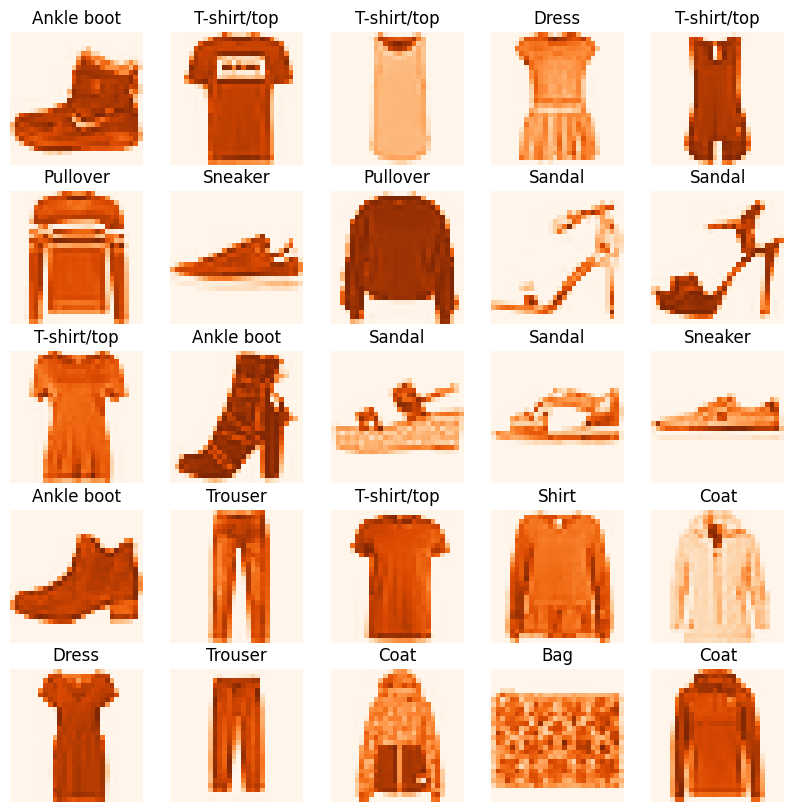

In [186]:
def plot_sample_images(images, labels, class_names, n=25):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i], cmap='Oranges')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels, class_names)


C:\Users\student\AppData\Local\Temp\ipykernel_10468\524493374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Oranges')


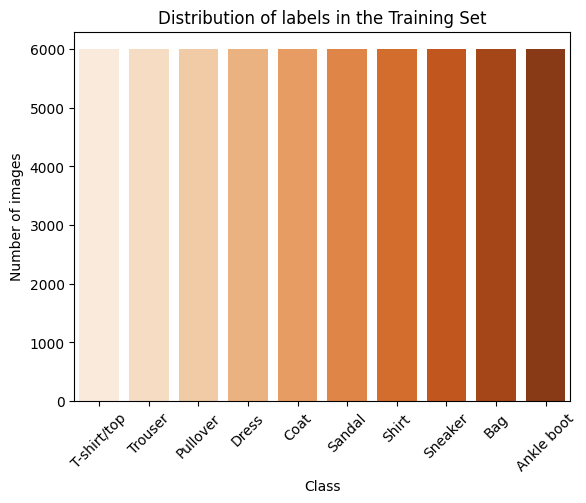

In [187]:
label_counts = pd.Series(train_labels).value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Oranges')
plt.title("Distribution of labels in the Training Set")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

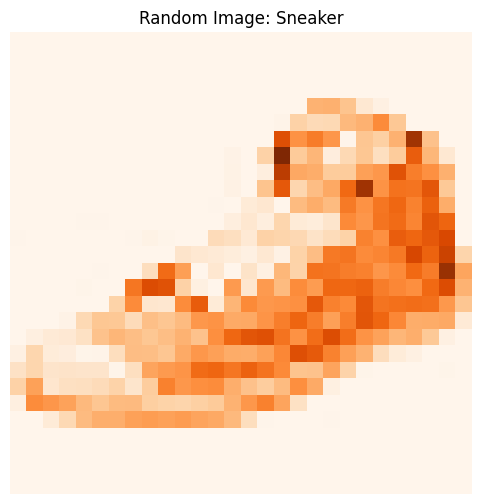

In [188]:
random_index = np.random.randint(0, train_images.shape[0])
plt.figure(figsize=(6, 6))
plt.imshow(train_images[random_index], cmap='Oranges')
plt.title(f"Random Image: {class_names[train_labels[random_index]]}")
plt.axis('off')
plt.show()

# Model Evaluation using Leaky ReLU function

In [189]:

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [190]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [191]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7494 - loss: 0.6831 - val_accuracy: 0.8589 - val_loss: 0.3811
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8796 - loss: 0.3257 - val_accuracy: 0.8803 - val_loss: 0.3180
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8993 - loss: 0.2737 - val_accuracy: 0.8901 - val_loss: 0.2857
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9106 - loss: 0.2422 - val_accuracy: 0.9020 - val_loss: 0.2670
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9200 - loss: 0.2183 - val_accuracy: 0.9028 - val_loss: 0.2673
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9282 - loss: 0.1928 - val_accuracy: 0.9028 - val_loss: 0.2686
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9329 - loss: 0.1790 - val_accuracy: 0.9092 - val_loss: 0.2619
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9403 - loss: 0.1571 - val_accurac

In [192]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(test_labels, y_pred_classes)
class_accuracies = cm.diagonal() / cm.sum(axis=1)

print("Class-wise Accuracy:")
for i, accuracy in enumerate(class_accuracies):
    print(f"Class {class_names[i]} Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Class-wise Accuracy:
Class T-shirt/top Accuracy: 0.7860
Class Trouser Accuracy: 0.9840
Class Pullover Accuracy: 0.8500
Class Dress Accuracy: 0.9430
Class Coat Accuracy: 0.8590
Class Sandal Accuracy: 0.9830
Class Shirt Accuracy: 0.7710
Class Sneaker Accuracy: 0.9540
Class Bag Accuracy: 0.9810
Class Ankle boot Accuracy: 0.9740


In [193]:
predictions = model.predict(test_images)

predictions = np.argmax(predictions, axis=1)

print("\nClassification Report:")
print(classification_report(test_labels, predictions, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.79      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.85      0.86      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.87      0.86      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.77      0.74      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



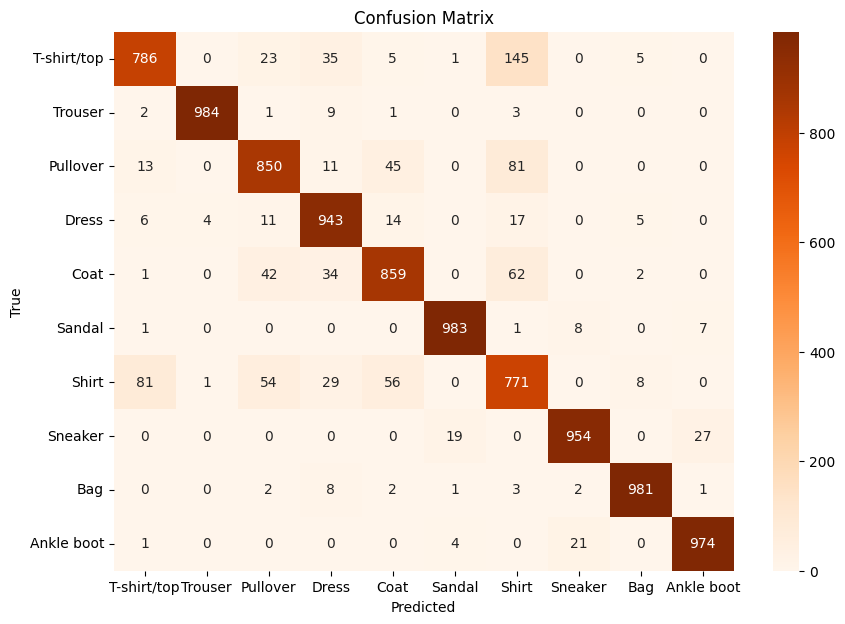

In [194]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Class-wise Accuracy:
Class T-shirt/top Accuracy: 0.7860
Class Trouser Accuracy: 0.9840
Class Pullover Accuracy: 0.8500
Class Dress Accuracy: 0.9430
Class Coat Accuracy: 0.8590
Class Sandal Accuracy: 0.9830
Class Shirt Accuracy: 0.7710
Class Sneaker Accuracy: 0.9540
Class Bag Accuracy: 0.9810
Class Ankle boot Accuracy: 0.9740


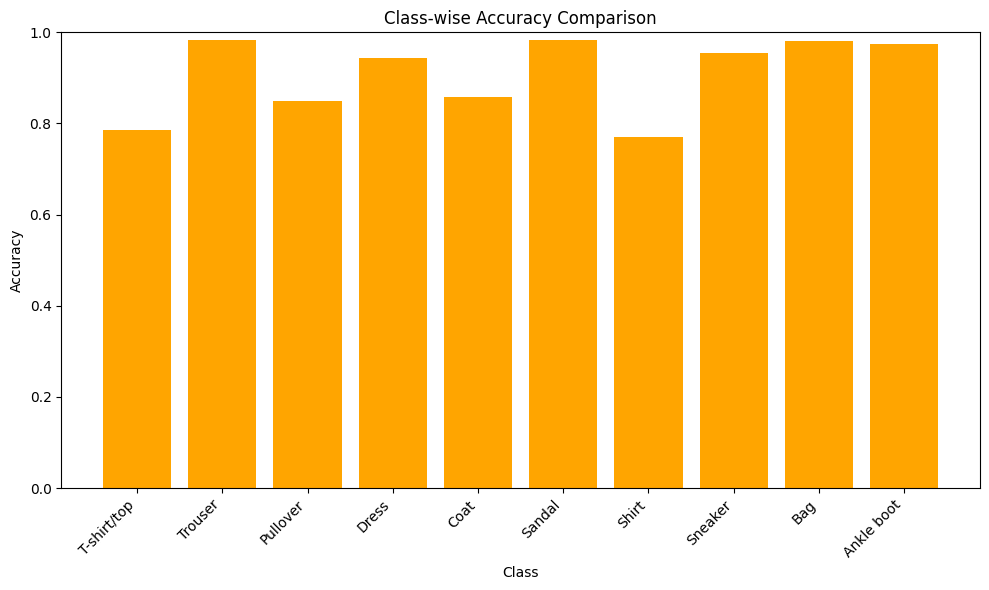

In [195]:
class_accuracies = cm.diagonal() / cm.sum(axis=1)

print("Class-wise Accuracy:")
for i, accuracy in enumerate(class_accuracies):
    print(f"Class {class_names[i]} Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies, color='orange')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy Comparison')
plt.xticks(rotation=45, ha='right') 
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

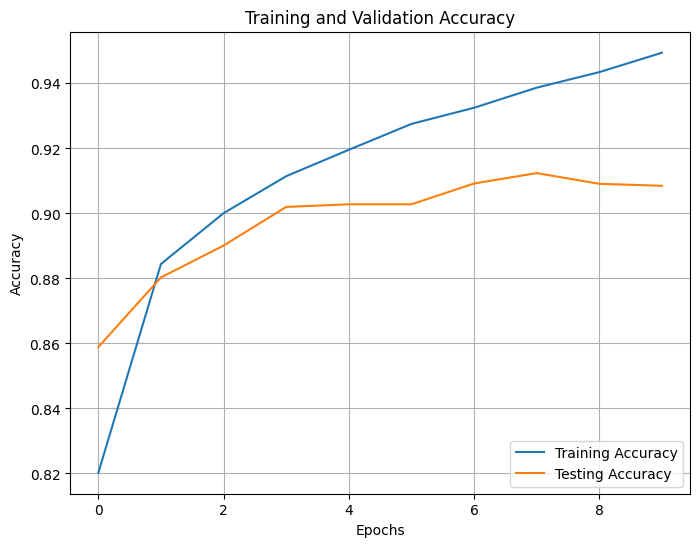

In [196]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_accuracy(history)

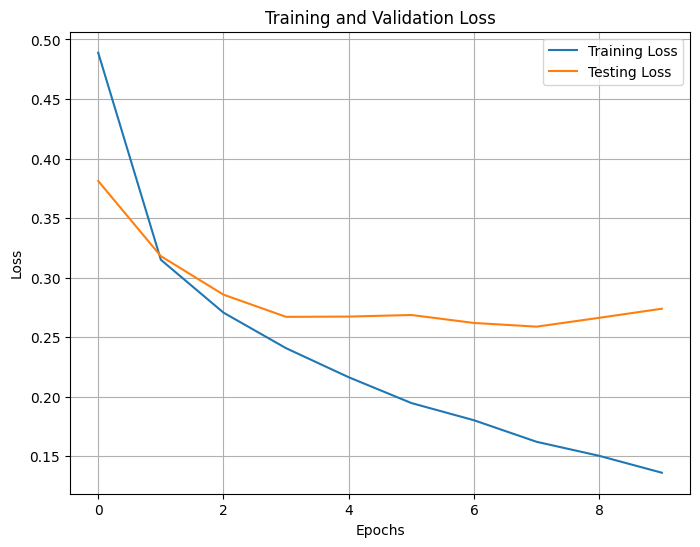

In [197]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Testing Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

plot_loss(history)
